In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sp

# Crop Parameters

In [3]:
df1=pd.read_csv("/content/drive/MyDrive/merge/CropParameters.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   %Time        23 non-null     int64  
 1   Stem_elong   23 non-null     object 
 2   Stem_thick   18 non-null     float64
 3   Cum_trusses  18 non-null     float64
 4   stem_dens    23 non-null     float64
 5   plant_dens   23 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.2+ KB


In [4]:
df1['Stem_elong'] = df1['Stem_elong'].astype(float)
df1['%Time'] = df1['%Time'].astype(float)

In [5]:
df1['%Time'] = pd.TimedeltaIndex(df1['%Time'], unit='d') + dt.datetime(1899, 12, 30)
df1.set_index("%Time", inplace=True)

In [6]:
df1 = df1.resample("1W").sum()

In [7]:
df1.isnull().sum()

Stem_elong     0
Stem_thick     0
Cum_trusses    0
stem_dens      0
plant_dens     0
dtype: int64

In [8]:
# filling null values using knn imputer
imputer = KNNImputer(n_neighbors=3)
cols = df1.columns
inds = df1.index
data = imputer.fit_transform(df1)
df1 = pd.DataFrame(data=data, columns=cols, index=inds)

In [9]:
df1.isnull().sum()

Stem_elong     0
Stem_thick     0
Cum_trusses    0
stem_dens      0
plant_dens     0
dtype: int64

In [10]:
df1.columns

Index(['Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ', 'plant_dens'], dtype='object')

Text(0.5, 0, 'Outlier detection')

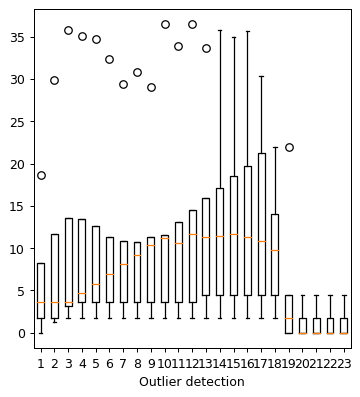

In [11]:
plt.figure(figsize=(10,5), dpi=90)
plt.subplot(1,2,1)
plt.boxplot(df1[['Stem_elong', 'Stem_thick', 'Cum_trusses', 'stem_dens ', 'plant_dens']])
plt.xlabel("Outlier detection")

# Tomatoe quality

In [12]:
df3=pd.read_csv("/content/drive/MyDrive/merge/TomQuality.csv")
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      8 non-null      int64  
 1   Flavour    8 non-null      int64  
 2   TSS        8 non-null      float64
 3   Acid       8 non-null      float64
 4   %Juice     8 non-null      int64  
 5   Bite       8 non-null      int64  
 6   Weight     8 non-null      float64
 7   DMC_fruit  7 non-null      object 
dtypes: float64(3), int64(4), object(1)
memory usage: 640.0+ bytes


In [13]:
df3['DMC_fruit'] = df3['DMC_fruit'].astype(float)

In [14]:
df3['%time'] = pd.TimedeltaIndex(df3['%time'], unit='d') + dt.datetime(1899, 12, 30)
df3.set_index("%time", inplace=True)

In [15]:
df3 = df3.resample("1W").sum()

In [16]:
df3.isnull().sum()

Flavour      0
TSS          0
Acid         0
%Juice       0
Bite         0
Weight       0
DMC_fruit    0
dtype: int64

In [17]:
df3.columns

Index(['Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight', 'DMC_fruit'], dtype='object')

Text(0.5, 0, 'Outlier detection')

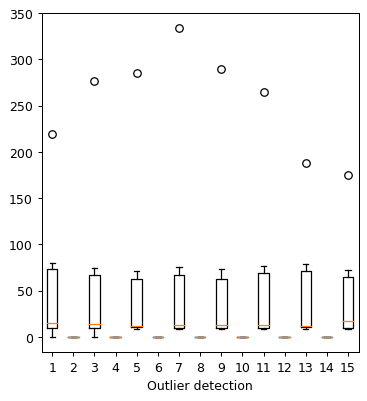

In [18]:
plt.figure(figsize=(10,5), dpi=90)
plt.subplot(1,2,1)
plt.boxplot(df3[['Flavour ', 'TSS', 'Acid', '%Juice', 'Bite', 'Weight', 'DMC_fruit']])
plt.xlabel("Outlier detection")

# Feature Selection

# Grodan Sensors

In [19]:
df4=pd.read_csv("/content/drive/MyDrive/merge/GrodanSens.csv")
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   %time     47809 non-null  float64
 1   EC_slab1  47809 non-null  object 
 2   EC_slab2  47809 non-null  object 
 3   WC_slab1  47809 non-null  object 
 4   WC_slab2  47809 non-null  object 
 5   t_slab1   47809 non-null  object 
 6   t_slab2   47809 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [20]:
for column in df4.columns:
    if df4[column].dtype == 'object':
        df4[column] = df4[column].astype(np.float64)

In [21]:
df4['%time'] = pd.TimedeltaIndex(df4['%time'], unit='d') + dt.datetime(1899, 12, 30)
df4.set_index("%time", inplace=True)

In [22]:
df4 = df4.resample("1W").sum()

In [23]:
df4.isnull().sum()

EC_slab1    0
EC_slab2    0
WC_slab1    0
WC_slab2    0
t_slab1     0
t_slab2     0
dtype: int64

In [24]:
df4.columns

Index(['EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1', 't_slab2'], dtype='object')

Text(0.5, 0, 'Outlier detection')

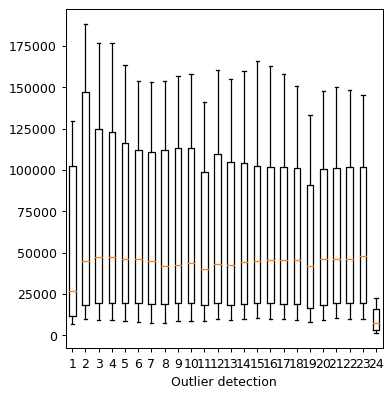

In [25]:
plt.figure(figsize=(10,5), dpi=90)
plt.subplot(1,2,1)
plt.boxplot(df4[['EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1', 't_slab2']])
plt.xlabel("Outlier detection")

In [26]:
#removing outliers using iqr
for cols in df4.columns:
    q1=df4[cols].quantile(0.25)
    q3=df4[cols].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    df_out1=df4[(df4[cols]>lower_limit)&(df4[cols]<upper_limit)]

In [27]:
df_out1.shape

(22, 6)

In [28]:
df4.shape

(24, 6)

In [29]:
df_out1

,EC_slab1,EC_slab2,WC_slab1,WC_slab2,t_slab1,t_slab2
%time,,,,,,
2019-12-29,9751.8,9793.1,188273.6,181271.8,44665.4,45104.4
2020-01-05,9262.1,10051.1,176644.3,150370.7,46687.7,47373.6
2020-01-12,9457.3,10742.4,176653.4,147720.9,46680.3,47478.9
2020-01-19,8327.6,10917.5,163309.2,139923.7,45541.3,46424.8
2020-01-26,7731.3,10848.0,153709.4,133626.6,45501.4,46338.0
2020-02-02,7375.1,10487.6,152980.3,133034.1,44398.5,45168.9
2020-02-09,7586.1,11268.8,153889.8,135401.8,41629.3,42290.8
2020-02-16,8648.7,11843.5,156846.7,136526.3,42052.7,42643.9
2020-02-23,8790.9,11713.1,157828.4,136091.1,43593.9,44069.3


# Production

In [30]:
df5=pd.read_csv("/content/drive/MyDrive/merge/Production.csv")
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   %time                     24 non-null     int64  
 1   ProdA                     24 non-null     float64
 2   ProdB                     24 non-null     float64
 3   avg_nr_harvested_trusses  24 non-null     float64
 4   Truss development time    24 non-null     float64
 5   Nr_fruits_ClassA          22 non-null     float64
 6   Weight_fruits_ClassA      24 non-null     float64
 7   Nr_fruits_ClassB          24 non-null     int64  
 8   Weight_fruits_ClassB      24 non-null     int64  
dtypes: float64(6), int64(3)
memory usage: 1.8 KB


In [31]:
df5['%time'] = pd.TimedeltaIndex(df5['%time'], unit='d') + dt.datetime(1899, 12, 30)
df5.set_index("%time", inplace=True)

In [32]:
df5 = df5.resample("1W").sum()

In [33]:
df5.isnull().sum()

ProdA                       0
ProdB                       0
avg_nr_harvested_trusses    0
Truss development time      0
Nr_fruits_ClassA            0
Weight_fruits_ClassA        0
Nr_fruits_ClassB            0
Weight_fruits_ClassB        0
dtype: int64

In [34]:
df5.columns

Index(['ProdA', 'ProdB', 'avg_nr_harvested_trusses', 'Truss development time ',
       'Nr_fruits_ClassA', 'Weight_fruits_ClassA', 'Nr_fruits_ClassB',
       'Weight_fruits_ClassB'],
      dtype='object')

Text(0.5, 0, 'Outlier detection')

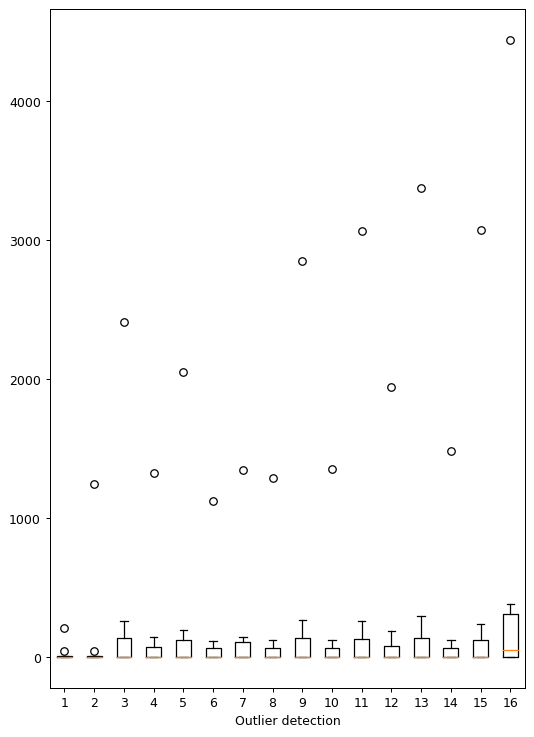

In [35]:
plt.figure(figsize=(15,10), dpi=90)
plt.subplot(1,2,1)
plt.boxplot(df5[['ProdA', 'ProdB', 'avg_nr_harvested_trusses', 'Truss development time ',
       'Nr_fruits_ClassA', 'Weight_fruits_ClassA', 'Nr_fruits_ClassB',
       'Weight_fruits_ClassB']])
plt.xlabel("Outlier detection")

# LabAnalysis

In [36]:
df6=pd.read_csv("/content/drive/MyDrive/merge/LabAnalysis.csv")
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   %Time       10 non-null     int64  
 1   irr_PH      10 non-null     float64
 2   irr_EC      10 non-null     float64
 3   irr_NH4     10 non-null     float64
 4   irr_K       10 non-null     float64
 5   irr_Na      10 non-null     float64
 6   irr_Ca      10 non-null     float64
 7   irr_Mg      10 non-null     float64
 8   irr_Si      10 non-null     float64
 9   irr_NO3     10 non-null     float64
 10  irr_Cl      10 non-null     float64
 11  irr_SO4     10 non-null     float64
 12  irr_HCO3    10 non-null     float64
 13  irr_PO4     10 non-null     float64
 14  irr_Fe      10 non-null     float64
 15  irr_Mn      10 non-null     float64
 16  irr_Zn      10 non-null     float64
 17  irr_B       10 non-null     float64
 18  irr_Cu      10 non-null     float64
 19  irr_Mo      10 non-null     floa

In [37]:
df6['%Time'] = pd.TimedeltaIndex(df6['%Time'], unit='d') + dt.datetime(1899, 12, 30)
df6.set_index("%Time", inplace=True)

In [38]:
df6 = df6.resample("1W").sum()

In [39]:
df6.isnull().sum()

irr_PH        0
irr_EC        0
irr_NH4       0
irr_K         0
irr_Na        0
irr_Ca        0
irr_Mg        0
irr_Si        0
irr_NO3       0
irr_Cl        0
irr_SO4       0
irr_HCO3      0
irr_PO4       0
irr_Fe        0
irr_Mn        0
irr_Zn        0
irr_B         0
irr_Cu        0
irr_Mo        0
drain_PH      0
drain_EC      0
drain_NH4     0
drain_K       0
drain_Na      0
drain_Ca      0
drain_Mg      0
drain_Si      0
drain_NO3     0
drain_Cl      0
drain_SO4     0
drain_HCO3    0
drain_PO4     0
drain_Fe      0
drain_Mn      0
drain_Zn      0
drain_B       0
drain_Cu      0
drain_Mo      0
dtype: int64

In [40]:
df6.columns

Index(['irr_PH', 'irr_EC', 'irr_NH4', 'irr_K', 'irr_Na', 'irr_Ca', 'irr_Mg',
       'irr_Si', 'irr_NO3', 'irr_Cl', 'irr_SO4', 'irr_HCO3', 'irr_PO4',
       'irr_Fe', 'irr_Mn', 'irr_Zn', 'irr_B', 'irr_Cu', 'irr_Mo', 'drain_PH',
       'drain_EC', 'drain_NH4', 'drain_K', 'drain_Na', 'drain_Ca', 'drain_Mg',
       'drain_Si', 'drain_NO3', 'drain_Cl', 'drain_SO4', 'drain_HCO3',
       'drain_PO4', 'drain_Fe', 'drain_Mn', 'drain_Zn', 'drain_B', 'drain_Cu',
       'drain_Mo'],
      dtype='object')

Text(0.5, 0, 'Outlier detection')

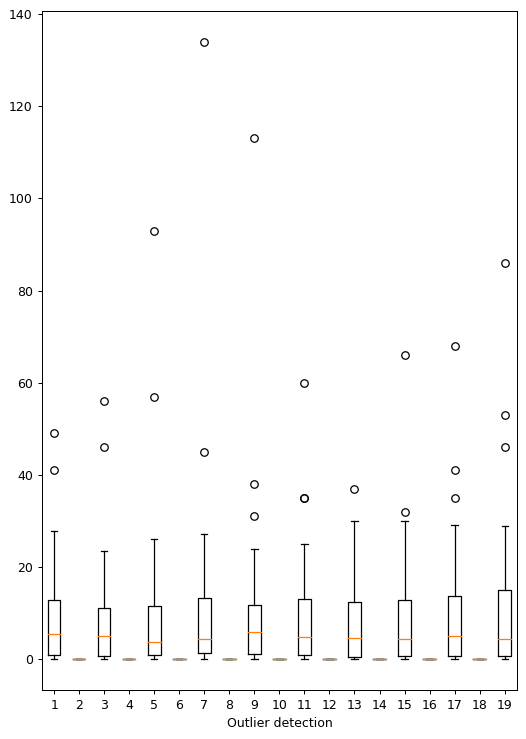

In [41]:
plt.figure(figsize=(15,10), dpi=90)
plt.subplot(1,2,1)
plt.boxplot(df6[['irr_PH', 'irr_EC', 'irr_NH4', 'irr_K', 'irr_Na', 'irr_Ca', 'irr_Mg',
       'irr_Si', 'irr_NO3', 'irr_Cl', 'irr_SO4', 'irr_HCO3', 'irr_PO4',
       'irr_Fe', 'irr_Mn', 'irr_Zn', 'irr_B', 'irr_Cu', 'irr_Mo', 'drain_PH',
       'drain_EC', 'drain_NH4', 'drain_K', 'drain_Na', 'drain_Ca', 'drain_Mg',
       'drain_Si', 'drain_NO3', 'drain_Cl', 'drain_SO4', 'drain_HCO3',
       'drain_PO4', 'drain_Fe', 'drain_Mn', 'drain_Zn', 'drain_B', 'drain_Cu',
       'drain_Mo']])
plt.xlabel("Outlier detection")

In [42]:
#removing outliers using iqr
for cols in df6.columns:
    q1=df6[cols].quantile(0.25)
    q3=df6[cols].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    df_out2=df6[(df6[cols]>lower_limit)&(df6[cols]<upper_limit)]

In [43]:
df_out2.shape

(16, 38)

In [44]:
df6.shape

(19, 38)

# Greenhouse climate

In [45]:
df8=pd.read_csv("/content/drive/MyDrive/merge/GreenhouseClimate.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [46]:
df8['%time'] = pd.TimedeltaIndex(df8['%time'], unit='d') + dt.datetime(1899, 12, 30)
df8.set_index("%time", inplace=True)

In [47]:
#we need to break greenhouse climate dataset as many of the columns have _sp and _vip as there extension which means that
#greenhouse climate data set is a combination of 3 datasets
sp_cols = []
vip_cols = []
indoor_cols = []

for col in df8.columns:
    df8[col] = df8[col].astype(float)

    if "_sp" in col:
        sp_cols.append(col)
    elif "_vip" in col:
        vip_cols.append(col)
    else:
        indoor_cols.append(col)

indoor_df = df8.loc[:, indoor_cols]
sp_df = df8.loc[:, sp_cols]
vip_df = df8.loc[:, vip_cols]

# Indoor dataset 

In [48]:
indoor_df.shape

(47809, 18)

In [49]:
indoor_df.isnull().sum()# In this case, most of the columns have 71 missing values, compared to the 47809 entrances, 
# the value is pretty small and those missing values can be dropped.
indoor_df.dropna(inplace=True)

In [50]:
indoor_df.columns

Index(['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC', 'EnScr',
       'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup'],
      dtype='object')

In [51]:
#removing outliers using iqr
for cols in indoor_df.columns:
    q1=indoor_df[cols].quantile(0.25)
    q3=indoor_df[cols].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    indoor_out=indoor_df[(indoor_df[cols]>lower_limit)&(indoor_df[cols]<upper_limit)]

In [52]:
indoor_df.shape

(47737, 18)

In [53]:
indoor_out.shape

(47316, 18)

# Setpoint dataset

In [54]:
sp_df.shape

(47809, 15)

In [55]:
sp_df.isnull().sum()

assim_sp                      47006
co2_sp                        41125
dx_sp                         47076
int_blue_sp                      14
int_farred_sp                    14
int_red_sp                       14
int_white_sp                     14
scr_blck_sp                   46814
scr_enrg_sp                   46698
t_grow_min_sp                 47809
t_heat_sp                     33319
t_rail_min_sp                 47076
t_vent_sp                     27810
water_sup_intervals_sp_min    41981
window_pos_lee_sp             47004
dtype: int64

In [56]:
# Water sup intervals and t_grow_min have too many missing values, due to that the whole columns have to be dropped
sp_df.drop(columns=["water_sup_intervals_sp_min", "t_grow_min_sp"], inplace=True)
# For the categories with a small number of missing values, the whole entrance will be dropped.
sp_df.drop(sp_df[sp_df["int_blue_sp"].isnull()].index, axis=0, inplace=True)

In [57]:
# The rest of the missing values will be imputed using a KNNImputer, using 3 neighbors to avoid overfitting

imputer = KNNImputer(n_neighbors=3)
cols = sp_df.columns
inds = sp_df.index
data = imputer.fit_transform(sp_df)
sp_df = pd.DataFrame(data=data, columns=cols, index=inds)

In [89]:
#removing outliers using iqr
for cols in sp_df.columns:
    q1=sp_df[cols].quantile(0.25)
    q3=sp_df[cols].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    sp_out=sp_df[(sp_df[cols]>lower_limit)&(sp_df[cols]<upper_limit)]

In [95]:
sp_out.shape

(24, 13)

In [96]:
sp_df.shape

(24, 13)

# VIP dataset

In [58]:
vip_df.isnull().sum()

assim_vip                         71
co2_vip                           71
dx_vip                            71
int_blue_vip                   24176
int_farred_vip                 24176
int_red_vip                    24176
int_white_vip                  24176
scr_blck_vip                      71
scr_enrg_vip                      71
t_grow_min_vip                    71
t_heat_vip                        71
t_rail_min_vip                    71
t_ventlee_vip                     71
t_ventwind_vip                    71
water_sup_intervals_vip_min       71
window_pos_lee_vip                71
dtype: int64

In [59]:
vip_df.drop(vip_df[vip_df["scr_blck_vip"].isnull()].index, axis=0, inplace=True)

In [60]:
imputer = KNNImputer(n_neighbors=3)
cols = vip_df.columns
inds = vip_df.index
data = imputer.fit_transform(vip_df)
vip_df = pd.DataFrame(data=data, columns=cols, index=inds)

# Merging all 3 greenhouse climate datasets

In [62]:
indoor_df = indoor_df.resample("1W").sum()
sp_df = sp_df.resample("1W").sum()
vip_df = vip_df.resample("1W").sum()

In [91]:
green1=pd.merge(indoor_out,sp_df, how='inner', left_index=True, right_index=True)

In [92]:
green=pd.merge(green1,vip_df, how='inner', left_index=True, right_index=True)

In [94]:
green.shape

(23, 47)

# Resources

In [66]:
df8=pd.read_csv("/content/drive/MyDrive/merge/Resources.csv")
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %Time      166 non-null    int64  
 1   Heat_cons  166 non-null    float64
 2   ElecHigh   166 non-null    float64
 3   ElecLow    166 non-null    float64
 4   CO2_cons   166 non-null    float64
 5   Irr        166 non-null    float64
 6   Drain      166 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 9.2 KB


In [67]:
df8.columns

Index(['%Time ', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr',
       'Drain'],
      dtype='object')

In [68]:
df8.rename(columns={"%Time ":"%Time"},inplace=True)

In [69]:
df8['%Time'] = pd.TimedeltaIndex(df8['%Time'], unit='d') + dt.datetime(1899, 12, 30)
df8.set_index("%Time", inplace=True)

In [70]:
df8.isnull().sum()

Heat_cons    0
ElecHigh     0
ElecLow      0
CO2_cons     0
Irr          0
Drain        0
dtype: int64

In [71]:
df8.columns

Index(['Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr', 'Drain'], dtype='object')

Text(0.5, 0, 'Outlier detection')

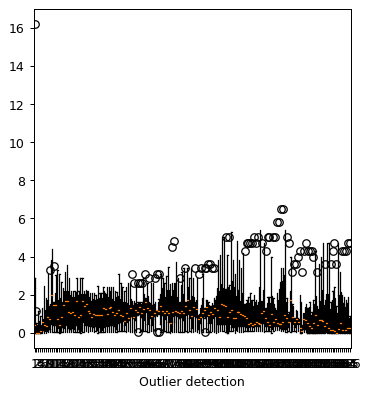

In [72]:
plt.figure(figsize=(10,5), dpi=90)
plt.subplot(1,2,1)
plt.boxplot(df8[['Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr', 'Drain']])
plt.xlabel("Outlier detection")

In [73]:
#removing outliers using iqr
for cols in df8.columns:
    q1=df8[cols].quantile(0.25)
    q3=df8[cols].quantile(0.75)
    IQR=q3-q1
    lower_limit=q1-1.5*IQR
    upper_limit=q3+1.5*IQR
    df_out3=df8[(df8[cols]>lower_limit)&(df8[cols]<upper_limit)]

In [74]:
df_out3.shape

(164, 6)

In [75]:
df8.shape

(166, 6)

# Merging datasets

In [97]:
merge=pd.merge(df1,df3, how='inner', left_index=True, right_index=True)
merge3=pd.merge(merge,df5, how='inner', left_index=True, right_index=True)
merge4=pd.merge(merge3,df_out2, how='inner', left_index=True, right_index=True)
merge5=pd.merge(merge4,df_out3, how='inner', left_index=True, right_index=True)
merge6=pd.merge(merge5,df_out1, how='inner', left_index=True, right_index=True)
merge6=pd.merge(merge6,green, how='inner', left_index=True, right_index=True)

In [98]:
merge6

,Stem_elong,Stem_thick,Cum_trusses,stem_dens,plant_dens,Flavour,TSS,Acid,%Juice,Bite,...,int_white_vip,scr_blck_vip,scr_enrg_vip,t_grow_min_vip,t_heat_vip,t_rail_min_vip,t_ventlee_vip,t_ventwind_vip,water_sup_intervals_vip_min,window_pos_lee_vip
2020-02-23,29.1,11.3,10.4,3.6,1.8,80,9.00,14.5,67,219,...,9.865000e+05,116600.0,159500.0,20160.0,42064.3,0.0,45256.8,45256.8,1367810.0,2419.2
2020-03-01,36.5,11.2,11.6,3.6,1.8,0,0.00,0.0,0,0,...,8.081667e+05,115832.0,154400.0,19760.0,42064.5,0.0,44394.5,44394.5,1412340.0,2371.2
2020-03-08,33.9,10.6,13.1,3.6,1.8,74,8.30,13.6,60,277,...,1.148900e+06,78706.0,125800.0,20160.0,41314.9,0.0,44461.5,44461.5,1294070.0,2419.2
2020-03-15,36.5,11.7,14.5,3.6,1.8,0,0.00,0.0,0,0,...,1.194000e+06,83872.0,121290.0,20160.0,41358.9,0.0,44597.2,44597.2,1261400.0,2419.2
2020-03-22,33.7,11.3,15.9,4.5,1.8,71,8.30,12.1,53,285,...,8.640333e+05,92892.0,121960.0,20160.0,41497.8,0.0,45289.7,45289.7,1413713.0,2419.2
2020-03-29,35.8,11.4,17.1,4.5,1.8,0,0.00,0.0,0,0,...,4.068333e+05,79716.0,106340.0,20020.0,42776.6,0.0,46133.1,46133.1,1236060.0,2402.4
2020-04-05,34.9,11.7,18.5,4.5,1.8,76,8.90,13.3,58,334,...,2.600000e+04,83516.0,110870.0,20000.0,42432.3,0.0,46230.7,46230.7,1394010.0,2400.0
2020-04-12,35.7,11.3,19.7,4.5,1.8,0,0.00,0.0,0,0,...,0.000000e+00,53982.0,94420.0,20160.0,42990.0,0.0,46721.0,46721.0,1336505.0,2419.2
2020-04-19,30.3,10.8,21.3,4.5,1.8,73,8.90,12.5,51,290,...,1.066667e+04,53197.0,97350.0,20160.0,42636.1,0.0,46313.0,46313.0,1400785.0,2419.2
2020-04-26,14.0,9.8,22.0,4.5,1.8,0,0.00,0.0,0,0,...,1.486667e+04,48141.0,87230.0,20160.0,42788.0,0.0,46700.9,46700.9,1317795.0,2419.2


# Feature Selection

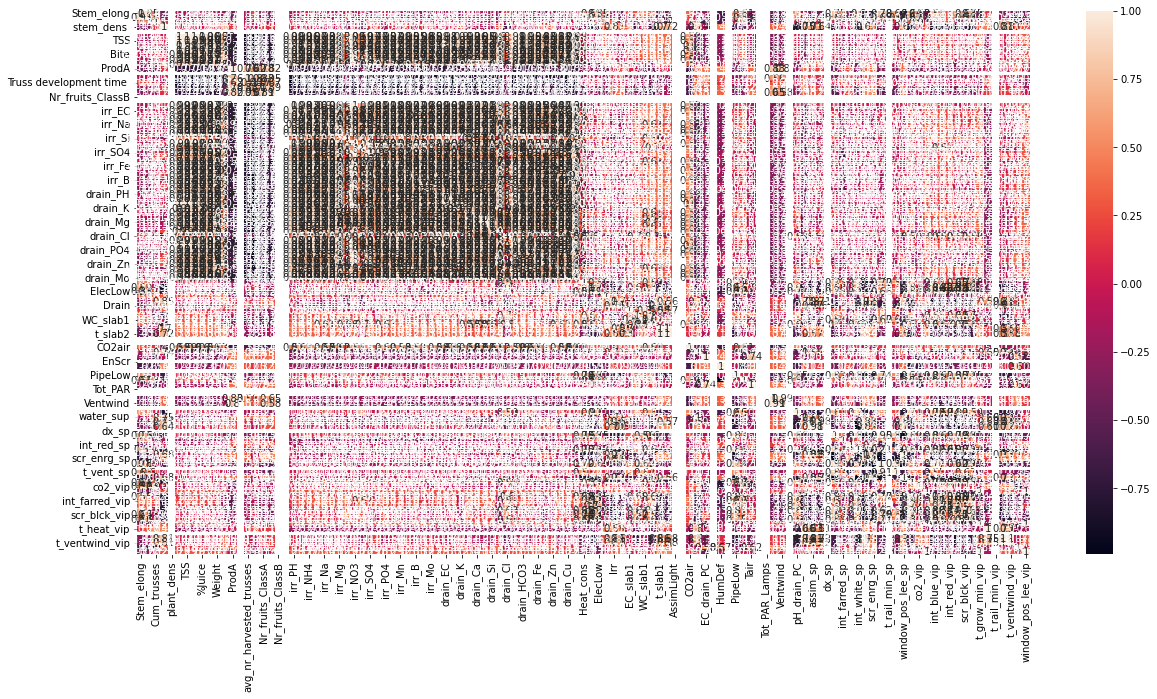

In [99]:
plt.figure(figsize=(20,10))
sp.heatmap(merge6.corr(),annot=True)

In [100]:
corr_matrix = merge6.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
merge6.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [101]:
merge6.shape

(13, 63)

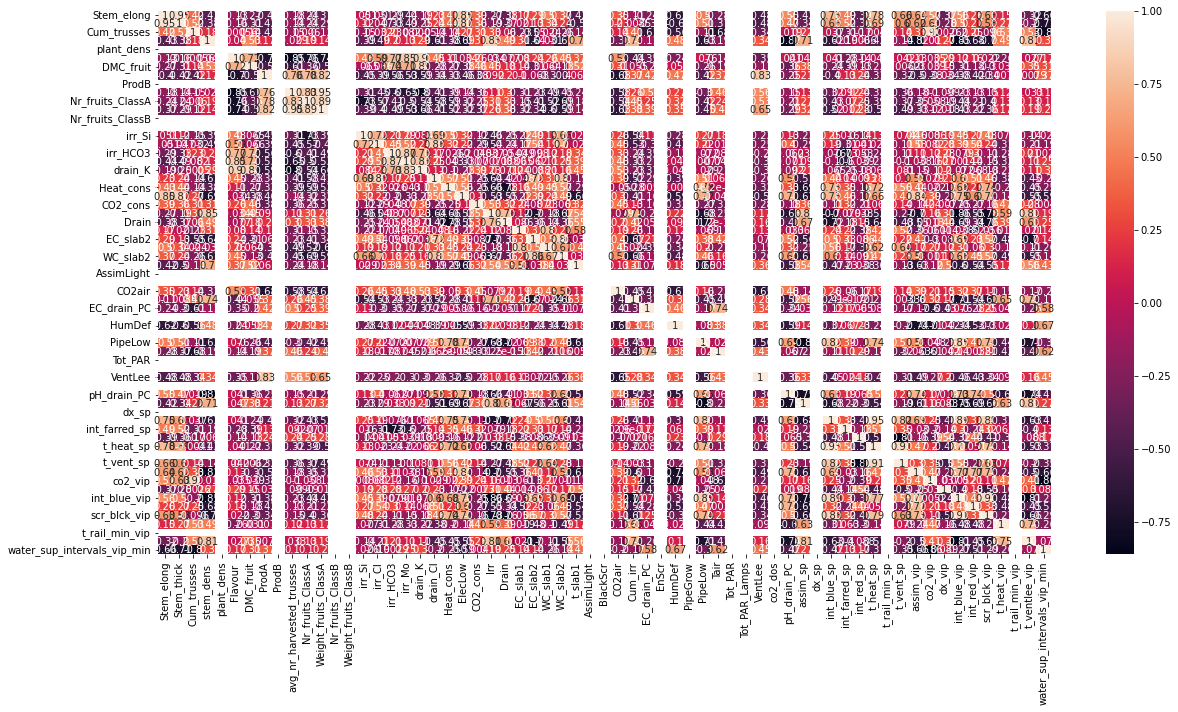

In [102]:
plt.figure(figsize=(20,10))
sp.heatmap(merge6.corr(),annot=True)

In [104]:
merge6.to_csv('Clean data.csv')